In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
data.shape

(569, 32)

In [4]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [6]:
# Split the dataset into input and output-->Train and test
# Train-->Building the model
# Test--> How well the model has learnt(generalize on unseen data)

In [7]:
#preaparing Input and output
#drop the id and diagnosis columns
x=data.drop(['id','diagnosis'],axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [8]:
y=data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [10]:
# Preparing Training and Testing Data
# Storing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train

(398, 30)
(171, 30)
(398,)
(171,)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
166,14.340,13.47,92.51,641.2,0.09906,0.07624,0.057240,0.046030,0.2075,0.05448,...,16.770,16.90,110.40,873.2,0.12970,0.15250,0.16320,0.10870,0.3062,0.06072
384,11.340,18.61,72.76,391.2,0.10490,0.08499,0.043020,0.025940,0.1927,0.06211,...,12.470,23.03,79.15,478.6,0.14830,0.15740,0.16240,0.08542,0.3060,0.06783
558,11.080,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.025830,0.1566,0.06669,...,11.350,16.82,72.01,396.5,0.12160,0.08240,0.03938,0.04306,0.1902,0.07313
451,12.340,26.86,81.15,477.4,0.10340,0.13530,0.108500,0.045620,0.1943,0.06937,...,15.650,39.34,101.70,768.9,0.17850,0.47060,0.44250,0.14590,0.3215,0.12050
333,12.180,14.08,77.25,461.4,0.07734,0.03212,0.011230,0.005051,0.1673,0.05649,...,12.850,16.47,81.60,513.1,0.10010,0.05332,0.04116,0.01852,0.2293,0.06037
117,15.490,19.97,102.40,744.7,0.11600,0.15620,0.189100,0.091130,0.1929,0.06744,...,21.200,29.41,142.10,1359.0,0.16810,0.39130,0.55530,0.21210,0.3187,0.10190
374,12.620,17.15,80.62,492.9,0.08583,0.05430,0.029660,0.022720,0.1799,0.05826,...,14.340,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330
244,19.730,19.82,130.70,1206.0,0.10620,0.18490,0.241700,0.097400,0.1733,0.06697,...,25.280,25.59,159.80,1933.0,0.17100,0.59550,0.84890,0.25070,0.2749,0.12970
496,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.030290,0.1945,0.06322,...,10.760,26.83,72.22,361.2,0.15590,0.23020,0.26440,0.09749,0.2622,0.08490
331,12.870,19.54,82.67,509.2,0.09136,0.07883,0.017970,0.020900,0.1861,0.06347,...,14.450,24.38,95.14,626.9,0.12140,0.16520,0.07127,0.06384,0.3313,0.07735


In [30]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
scaled_x_train

#Scaling for test data
#Testing the data based on training data
scaled_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
scaled_x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.767981,-0.055433,-0.795918,-0.721932,-0.589333,-0.996232,-0.780212,-0.661564,0.810759,-0.417646,...,-0.785433,0.137175,-0.806874,-0.716765,-0.854530,-0.972772,-0.923478,-0.752143,0.726302,-0.720284
1,-0.116925,-0.731688,-0.158591,-0.209416,-0.875377,-0.728226,-0.760262,-0.697520,0.281483,-0.839423,...,-0.273344,-0.865993,-0.216452,-0.348722,-0.911689,-0.222689,-0.624656,-0.633669,0.824098,-0.330910
2,1.100998,-0.544639,1.047734,0.940735,-0.426476,0.438365,0.300001,0.371772,-0.289084,-0.675726,...,0.870599,-0.559798,0.797992,0.733636,-0.216988,0.157285,0.858626,0.630104,-0.015897,-0.042321
3,-0.922326,1.220340,-0.929322,-0.818221,-0.951934,-0.683493,-0.888348,-1.005166,0.671871,0.132434,...,-0.647087,1.035458,-0.669891,-0.636120,-0.476402,-0.531335,-0.990740,-1.196269,0.363061,-0.372215
4,0.570612,-1.021855,0.510866,0.408905,-0.045084,-0.310914,-0.386171,-0.065263,-0.232778,-0.535625,...,0.319276,-0.972569,0.280965,0.134281,-0.467608,-0.472006,-0.138962,0.016578,-0.127664,-0.710370
5,0.118802,0.052480,0.102115,0.016191,-0.815524,-0.448449,0.035316,-0.471153,-1.216256,-0.725867,...,0.028129,0.517804,0.049193,-0.070207,-0.982038,0.145952,0.601168,-0.239713,-0.663793,-0.461986
6,-0.234789,-1.045835,-0.284674,-0.286112,-1.534461,-0.987011,-0.670679,-0.541291,-1.542830,-1.357058,...,0.040518,-0.503973,-0.057778,-0.070033,-1.346975,-0.794651,-0.622640,-0.176849,-1.439173,-1.154268
7,0.312435,2.757502,0.474262,0.176300,0.640447,2.115854,2.155208,1.175703,1.242437,1.347624,...,0.280044,2.953826,0.661307,0.076976,0.460125,3.657716,4.592021,1.870756,2.161802,3.187775
8,-1.310714,-0.192123,-1.298215,-1.050547,0.369018,-0.810237,-0.740694,-0.855774,-1.092383,1.062998,...,-0.855639,-0.052293,-0.910874,-0.751079,0.090790,-0.920642,-0.726430,-0.926076,-0.693481,-0.091337
9,1.072936,1.285088,0.954189,0.965647,-0.490505,-0.600109,-0.360885,-0.010570,-0.972263,-1.073907,...,0.982102,1.583563,0.851478,0.782407,0.011647,-0.416010,-0.254843,0.027156,-0.606164,-0.194877


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_train

array([[ 0.0654828 , -1.35518629,  0.03134589, ..., -0.04689041,
         0.3683001 , -1.22806684],
       [-0.77639967, -0.1225787 , -0.77192193, ..., -0.39868555,
         0.3648074 , -0.83648993],
       [-0.84936282, -1.05782571, -0.87563499, ..., -1.03880764,
        -1.65746674, -0.54459715],
       ...,
       [-0.88303812, -0.35998755, -0.85204535, ..., -0.1993652 ,
        -0.98162901, -0.01313199],
       [ 1.07854805,  0.213151  ,  0.91351698, ...,  0.10120204,
         3.54665843, -1.20658794],
       [-0.26846391, -0.90674734, -0.26149099, ..., -0.22037015,
         1.74267813,  0.1823811 ]])

In [ ]:
#Before Splitting if u apply stadardization-->

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train =pd. DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
scaled_X_train
scaled_X_test =pd. DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.820383,-0.173809,-0.864054,-0.772484,-0.839113,-1.115846,-0.895059,-0.803603,0.581700,-0.557191,...,-0.867791,-0.052852,-0.896889,-0.798979,-1.019902,-1.079349,-1.007702,-0.923140,0.358435,-0.918749
1,-0.141927,-0.792820,-0.198179,-0.230883,-1.152495,-0.871458,-0.875741,-0.842076,0.091697,-0.935263,...,-0.349774,-0.954952,-0.300309,-0.418776,-1.077035,-0.417112,-0.746220,-0.800681,0.438508,-0.516902
2,1.127255,-0.621604,1.062181,0.984540,-0.660692,0.192327,0.150940,0.302088,-0.436534,-0.788529,...,0.807410,-0.679606,0.724717,0.699342,-0.382650,-0.081638,0.551709,0.505600,-0.249256,-0.219070
3,-0.981224,0.993971,-1.003433,-0.874237,-1.236369,-0.830667,-0.999770,-1.171264,0.453118,-0.064110,...,-0.727843,0.754930,-0.758478,-0.715669,-0.641946,-0.689611,-1.066559,-1.382204,0.061024,-0.559531
4,0.574547,-1.058424,0.501265,0.422529,-0.242850,-0.490922,-0.513499,-0.165548,-0.384406,-0.662945,...,0.249706,-1.050791,0.202296,0.080185,-0.633156,-0.637230,-0.321219,-0.128562,-0.340767,-0.908518
5,0.103722,-0.075030,0.074205,0.007528,-1.086921,-0.616336,-0.105361,-0.599859,-1.294910,-0.833474,...,-0.044812,0.289428,-0.031892,-0.131059,-1.147353,-0.091644,0.326423,-0.393474,-0.779735,-0.652177
6,-0.264751,-1.080375,-0.329909,-0.311931,-1.874569,-1.107437,-0.788995,-0.674909,-1.597252,-1.399261,...,-0.032280,-0.629405,-0.139979,-0.130879,-1.512125,-0.922088,-0.744457,-0.328495,-1.414593,-1.366634
7,0.305504,2.401014,0.463021,0.176723,0.508199,1.721987,1.947387,1.162312,0.981349,1.025162,...,0.210019,2.480025,0.586606,0.020986,0.294157,3.008840,3.818576,1.787982,1.533782,3.114493
8,-1.385959,-0.298928,-1.388850,-1.119747,0.210830,-0.946242,-0.856792,-1.011412,-1.180228,0.770029,...,-0.938810,-0.223232,-1.001974,-0.834427,-0.075011,-1.033324,-0.835277,-1.102923,-0.804042,-0.269656
9,1.098012,1.053238,0.964446,1.010865,-0.730840,-0.754631,-0.489013,-0.107026,-1.069021,-1.145450,...,0.920204,1.247815,0.778761,0.749724,-0.154118,-0.587792,-0.422620,-0.117629,-0.732549,-0.376512


In [14]:
# model Building :
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6,metric='euclidean')
## apply the knn object on the dataset(Training phase) 

## syntax objectname.fit(input,output)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [15]:
# prediction on the data
# predict function ----> gives the predicted values
# syntax:object nam.predict(input)
y_train_pred=knn.predict(scaled_X_train)
y_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [16]:
# chect the accuracy , classification report 
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       257
           M       1.00      0.94      0.97       141

   micro avg       0.98      0.98      0.98       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.98      0.98       398



In [17]:
from sklearn.metrics import accuracy_score
# Check for optimum k-value
# Build the models with multiple k values--> error
scores=[]
for k in range(1,20):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test=knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
scores

[0.9473684210526315,
 0.9239766081871345,
 0.935672514619883,
 0.9298245614035088,
 0.9473684210526315,
 0.935672514619883,
 0.9473684210526315,
 0.9415204678362573,
 0.9473684210526315,
 0.9298245614035088,
 0.9415204678362573,
 0.9298245614035088,
 0.935672514619883,
 0.9239766081871345,
 0.9239766081871345,
 0.9239766081871345,
 0.9473684210526315,
 0.9239766081871345,
 0.935672514619883]

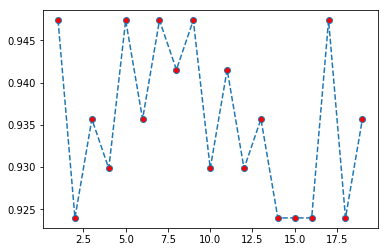

In [32]:
# Plot of K values and Scores
plt.plot(range(1,20), scores, marker='o', markerfacecolor='r', linestyle='--')

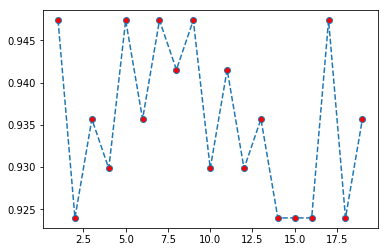

In [31]:
#plot of k values and scores
plt.plot(range(1,20),scores,marker='o',markerfacecolor='r',linestyle='--')

In [20]:
# Optimum k value is 7
final_model = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [21]:
#prediction on training data
final_train_pred= final_model.predict(scaled_X_train)
final_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

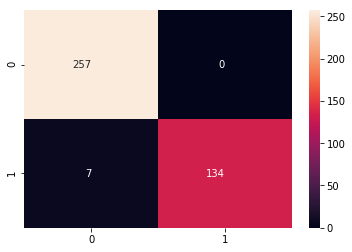

In [22]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt='d',annot_kws={'size':10,'va':'center','ha':'right'})

In [23]:
# classification report
# Precision-->ppv-->out of the positive predicted values,how many truly positive
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       257
           M       1.00      0.95      0.97       141

   micro avg       0.98      0.98      0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [24]:
#prediction on test Data
final_test_pred=final_model.predict(scaled_X_test)
final_test_pred

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

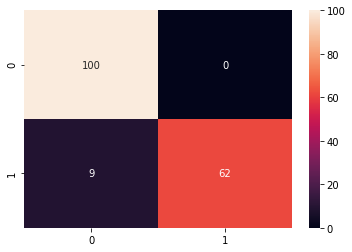

In [25]:
#compare actual values of test data(y_test) and final_test_pred(model predicted values)
sns.heatmap(confusion_matrix(y_test,final_test_pred),annot=True,fmt='d')

In [26]:
# classification report for test data
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           B       0.92      1.00      0.96       100
           M       1.00      0.87      0.93        71

   micro avg       0.95      0.95      0.95       171
   macro avg       0.96      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



What is the accuracy we can get with our data random_state=2, 80%, random_state=5, 82%, random_state= 6, 76%

Whenever we keep changing our random state, accuracy fluctuates. In order to overcome this problem we use KFold Cross Validation

When we use KFold Cross Validation--> Our model will be trained on all the records considering all the splits

